In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# Reading CSV file

df= pd.read_csv('Customers.csv')

In [4]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [12]:
X=df.iloc[:,[3,4]].values

In [13]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

## Hyper parameter tuning 

DBSCAN is a density based apporach 

The hyper parameters in DBSCAN are epsilon and min_sample

min_sample we choose it basis on the data

thumb rule for min_sample is ===> minpoints>= dimension of data set+1

we choose larger minpoints if our dataset have more noisy

Epsilon is most important hyperparamter 

we calculate this with help of elbow method 

we plot graph between distance between points and epsilon 

where the plot suddenly rise we take that point as epsilon 


In [83]:
# we use nearestneighbors for calculating distance between points
from sklearn.neighbors import NearestNeighbors

In [85]:
# calculating distances
neigh=NearestNeighbors(n_neighbors=2)
distance=neigh.fit(X)

In [87]:
# indices and distance values
distances,indices=distance.kneighbors(X)

In [89]:
# Now sorting the distance increasing order

sorting_distances=np.sort(distances,axis=0)

In [90]:
# sorted distances
sorted_distances=sort_distances[:,1]

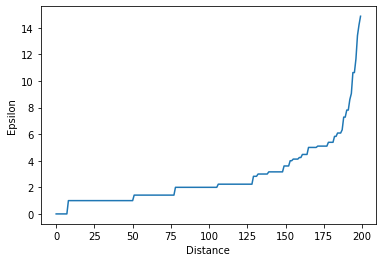

In [91]:
# plot between distance vs epsilon

plt.plot(sorted_distances)
plt.xlabel('Distance')
plt.ylabel('Epsilon')
plt.show()

If we observe the grpah at epsilon is equal to 9 graph continuous increases so we take epsilon equal to 9

## DBSCAN

In [92]:
from sklearn.cluster import DBSCAN


In [180]:
# intializing DBSCAN
clustering_model=DBSCAN(eps=9,min_samples=4)

In [181]:
# fit the model to X
clustering_model.fit(X)

DBSCAN(eps=9, min_samples=4)

In [182]:
# predicted labels by DBSCAN
predicted_labels=clustering_model.labels_

Text(0.5, 1.0, 'DBSCAN')

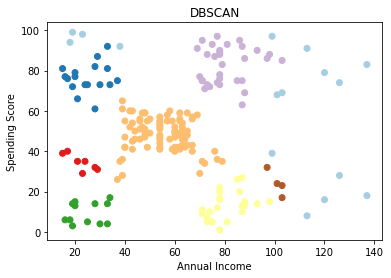

In [183]:
plt.scatter(X[:,0], X[:,1],c=predicted_labels, cmap='Paired')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title("DBSCAN")
    


In [184]:
from sklearn import metrics

In [185]:
metrics.silhouette_score(X, predicted_labels)

0.4259680122384905